In [10]:
# Run this in Python once, it should take effect permanently
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [11]:
#Imports
import os
from os import path

# Imports url
import urllib.request
from bs4 import BeautifulSoup
import html2text

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

#Plot
import matplotlib.pyplot as plt


## Read in the html page of the Friends episode transcripts

In [12]:
path = './season/'
filename = '0101.html'

def open_html(filename_html):
    '''
    Import html screenplay file.
    
    Parameters:
    ----------
    filename_html - String. File name.
    
    Return:
    ------
    File.
    
    '''
    
    filename = path+filename_html
    
    f = open(filename, 'r').read()
    #print(f)
    return f

#filename = './season/0101.html'
#f = open(filename, "r").read()
#print(f)

In [13]:
f = open_html(filename)

## Convert html into readable text using html2text

In [14]:
def convert_html_to_text(file):
    '''
    Convert html file into text file. 
    
    Parameters:
    ----------
    file - Html file. 
    
    Return:
    ------
    episode - txt file, converted from html.
    '''
    
    h = html2text.HTML2Text()
    # Ignore converting links from HTML
    h.ignore_links = True
    print(h.handle(file))
    episode = h.handle(file)
    return episode

In [15]:
first_episode = convert_html_to_text(f)

# The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)

* * *

Written by: Marta Kauffman & David Crane  
Transcribed by: guineapig  
Additional transcribing by: Eric Aasen  
(Note: The previously unseen parts of this episode are shown in blue text.)

* * *

**

** [Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]

**Monica:** There's nothing to tell! He's just some guy I work with!

**Joey:** C'mon, you're going out with the guy! There's gotta be something
wrong with him!

**Chandler:** All right Joey, be nice.  So does he have a hump? A hump and a
hairpiece?

**Phoebe:** Wait, does he eat chalk?

(They all stare, bemused.)

**Phoebe:** Just, 'cause, I don't want her to go through what I went through
with Carl- oh!

**Monica:** Okay, everybody relax. This is not even a date. It's just two
people going out to dinner and- not having sex.

**Chandler:** Sounds like a date to me.

[Time Lapse]

**Chandler:** Alright, so I'm back in high school, I'm sta

In [440]:
def add_stopwords_to_wordcloud(stop_friends_on_off):
    '''
    Set on and off stopwords - whether to use Friends names or not. If 'True' it will add Friends names to stopwords.
    
    Parameters:
    ----------
    stop_friends_on_off - True/False statement.
    
    Return:
    ------
    stopwords - list of the used stopwords.
    '''
    
    stopwords = set() #set(STOPWORDS) for default exclusion
    
    stopwords.add("Scene")
    print(stopwords)
    # Need to add stopwords for Frinds if I don't want to show their names
    stop_friends = stop_friends_on_off

    if stop_friends == True:
        stopwords.add("Monica")
        stopwords.add("Rachel")
        stopwords.add("Ross")
        stopwords.add("Phoebe")
        stopwords.add("Chandler")
        stopwords.add("Joey")
        print('Friends names will be excluded.')
    else:
        print('Firends names will be included.')

    return stopwords


In [479]:
stopwords = add_stopwords_to_wordcloud(True);

{'Scene'}
Friends names will be excluded.


In [480]:
max_font_size = 100
min_font_size = 3
bck_color = 'white'
#width = 500
#height = 300
width=1600
height=800
colourmap = plt.cm.cividis_r
relative_scaling = 0

def generate_wordcloud_bilinear(episode, max_font_size ):
    '''
    Make a wordcloud based on the episode. Use bilinear interpolation and max font size.
    
    Parametes:
    ---------
    episode - txt of the loaded episode.
    font_size - Integer. Maximum font size used on the image.
    
    Return:
    ------
    Makes a wordcloud and plots it.
    '''
    
    # lower max_font_size
    wordcloud = WordCloud(width=width, height=height, background_color=bck_color, 
                          max_font_size=max_font_size, stopwords=stopwords, colormap = colourmap,
                         relative_scaling=relative_scaling).generate(episode)
    
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

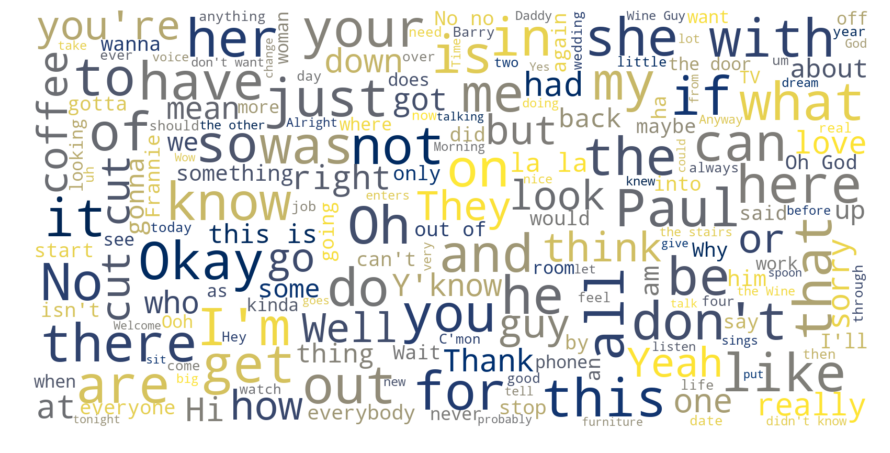

In [481]:
generate_wordcloud_bilinear(first_episode, max_font_size)

In [487]:
mask_image = 'friends_couch.jpg'

def generate_wordcloud_with_mask(mask_image, episode):
    '''
    Make a wordcloud using image as a mask.
    
    Parameters:
    ----------
    mask_image - Image. Used as a mask.
    episode - txt file. 
    
    Return:
    ------
    Saves wordcloud figure and plots the output.
    '''

    friends_mask = np.array(Image.open(mask_image))

    wc = WordCloud(width=width, height=height, background_color="white", max_words=2000, mask=friends_mask,
               stopwords=stopwords, contour_width=2, min_font_size=min_font_size, contour_color='grey', 
                  colormap = colourmap).generate(episode)

    # store to file
    wc.to_file("F.png")
    # show
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    plt.show()
    return

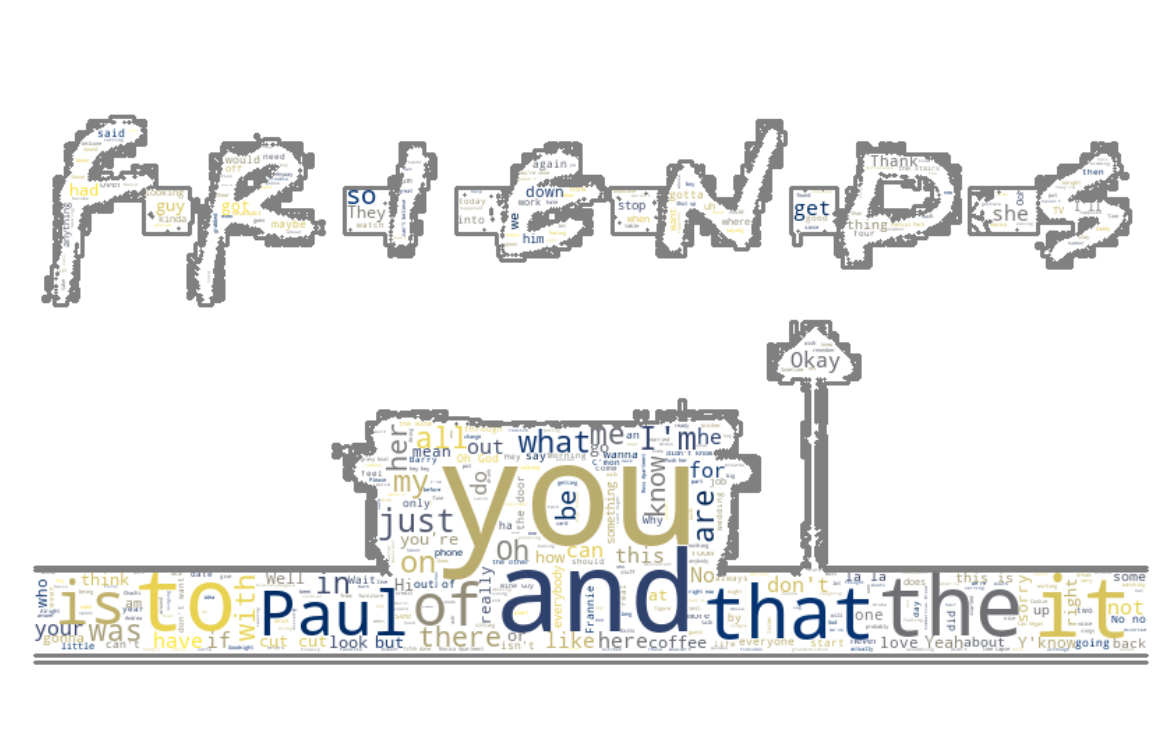

In [488]:
generate_wordcloud_with_mask(mask_image, first_episode)

In [446]:
import re

In [482]:
#friend_name = '**Monica:**'
#friend_name = '**Rachel:**'
#friend_name = '**Ross:**'
#friend_name = '**Joey:**'
friend_name = '**Phoebe:**'
#friend_name = '**Chandler:**'

def get_friend_line(friend_name, episode):
    '''
    
    '''
    file_episode = open('testfile.txt','w') 
    file_episode.write(episode) 
    
    
    searchquery = friend_name

    with open('testfile.txt') as f1:
        with open('test_monica.txt', 'w') as f2:
            lines = f1.readlines()
            for i, line in enumerate(lines):
                if line.startswith(searchquery):
                    f2.write(line)
                
    file = open('test_monica.txt', 'r') 
    monica_1 = file.read();
    
    return monica_1

In [483]:
rachel = get_friend_line(friend_name, first_episode)
print(rachel)

**Phoebe:** Wait, does he eat chalk?
**Phoebe:** Just, 'cause, I don't want her to go through what I went through
**Phoebe:** No.
**Phoebe:** Ooh! Oh! (She starts to pluck at the air just in front of Ross.)
**Phoebe:** Fine!   Be murky!
**Phoebe:**   If I let go of my hair, my head will fall off.
**Phoebe:** (sings) Raindrops on roses and rabbits and kittens, (Rachel and
**Phoebe:** (grins and walks to the kitchen and says to Chandler and Joey.) I
**Phoebe:** What does that mean?    Does he sell it, drink it, or just
**Phoebe:** Ooh, I just pulled out four eyelashes. That can't be good.
**Phoebe:** Oh, I wish I could, but I don't want to.
**Phoebe:** (singing) Love is sweet as summer showers, love is a wondrous work
**Phoebe:** Oh no, don't hate, you don't want to put that out into the
**Phoebe:** All right, c'mere, gimme your feet. (She starts massaging them.)
**Phoebe:** Give her a break, it's hard being on your own for the first time.
**Phoebe:** You're welcome. I remember when I fi

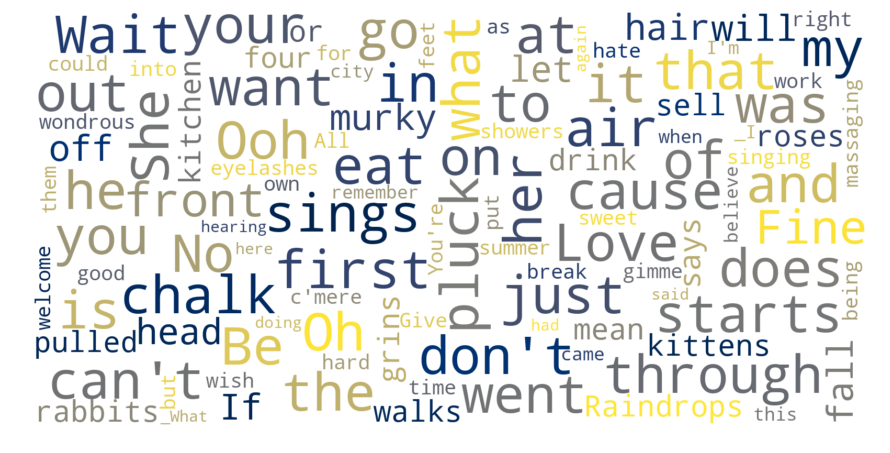

In [484]:
generate_wordcloud_bilinear(rachel, max_font_size)

In [268]:
#with open("testfile.txt") as fh:
#    for line in fh:
#        if line.startswith("**Monica:**"):
#            print(line)

In [270]:
#searchquery = '**Monica:**'
#
#with open('testfile.txt') as f1:
#    with open('test_monica.txt', 'a') as f2:
#        lines = f1.readlines()
#        for i, line in enumerate(lines):
#            if line.startswith(searchquery):
#                f2.write(line)

In [269]:
#file = open('test_monica.txt', 'r') 
#monica_1 = file.read()

In [391]:
import collections
import re
import matplotlib.pyplot as plt
%matplotlib inline

How many top words do you wish to print?10
The most common 10 words are:
phoebe : 19
i : 13
to : 7
and : 6
just : 4
dont : 4
oh : 4
the : 4
does : 3
want : 3


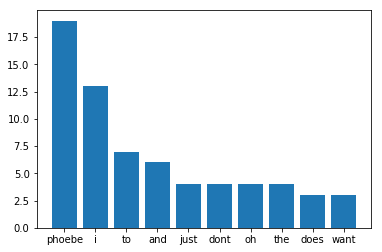

In [486]:
#https://medium.com/@agrimabahl/elegant-python-code-reproduction-of-most-common-words-from-a-story-25f5e28e0f8c
file = open('test_monica.txt', 'r')
file = file.read()
#stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords#.union(set(['']))
wordcount = collections.defaultdict(int)
""" 
the next paragraph does all the counting and is the main point of difference from the original article. More on this is explained later.
"""
# \W is regex for characters that are not alphanumerics.
# all non-alphanumerics are replaced with a blank space using re.sub
pattern = r"\W"
for word in file.lower().split():
    word = re.sub(pattern, '', word)
    if word not in stopwords:
        wordcount[word] += 1
# printing most common words
to_print = int(input("How many top words do you wish to print?"))
n = to_print
print(f"The most common {n} words are:")
# the next line sorts the default dict on the values in decreasing  # order and prints the first "to_print".
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:to_print] # this is continued from the previous assignment
for word, count in mc:
    print(word, ":", count)
# Draw the bart chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
#plt.savefig('bar.png')
plt.show()